In [1]:
# @title
install.packages("devtools"); require(devtools)
install_github("burrm/lolcat"); require(lolcat)

install.packages("dplyr"); require(dplyr)
install.packages("EMSaov"); require(EMSaov)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Loading required package: devtools

Loading required package: usethis




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpKxMVRH/remotes4981c21df0/burrm-lolcat-a42620f/DESCRIPTION’ ... OK
* preparing ‘lolcat’:
* checking DESCRIPTION meta-information ... OK
* installing the package to process help pages
* saving partial Rd database
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘lolcat_2.0.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lolcat

lolcat 2.0.0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: EMSaov



In [4]:
ro<-round.object
nqtr<-function(x,d){noquote(t(round.object(x, d)))}
options(scipen=999)

<table width="850">
<td bgcolor="#ba2f2a"><font color="white" size="8"><b>
W3: Continuous MSA
</b></font></td></table>

<table width="850">
<td bgcolor="#d5695d"><font color="white" size="6"><b>
1. Measurement System Analysis
</b></font></td></table>


<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
1.1 Terms</b><br><br>
1. Stability ---- through Time or Control<br>
2. Reliability ---- Precision (Variability)<br>
3. Validity ---- Accuracy (Close to True Value / Reference Value)<br>
4. Resolution ---- 10 increments of Natural Tolerance<br>
5. Repeatability ---- Within appraiser/system Variation (EV^2)<br>
6. Reproducibility ---- Between appraiser/system Variation (AV^2)</font></td></table>

<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
1.2 Precision to Tolerance Ratio</b><br><br>
P/T Ratio<br>
= Natural Tolerance / Specification Tolerance<br>
= 6 * sigma / (USL - LSL)
</font></td></table>

<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
1.3 Components of Variance</b><br><br>
&#10140; Equipment Variation: EV^2 = Repeatability = σ(gauge)^2 <br>
&#10140; Appraiser Variation: AV^2 = Reproducibility = σ(appraiser)^2 + σ(appraiser*part)^2 <br>
&#10140; EV^2 + AV^2 = GRR^2 <br>
&#10140; Part Variation: PV^2 = Process
</font></td></table>

<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
1.4 Type of Studies</b><br><br>
&#10140; Potential Studies: 10 parts measured 2-3 times <br>
&#10140; Short-term Studies: 25 parts measured 5-8 times <br>
&#10140; Long-term Studies: 8-10 parts measured 25+ times
</font></td></table>

<table width="900">
<td bgcolor="#d5695d"><font color="white" size="6"><b>
2. Potential MSA
</b></font></td></table>

<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.1 Import data
</b><br><br>
&#10140; Two Appraisers -------- a =2 <br>
&#10140; 10 parts -------------------- b = 10 <br>
&#10140; Two Repetitions -------- n = 2
</font></td></table>

In [2]:
# Potential Study (Gauge R&R) ---------------------------------------------
potential <- read.delim("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/potential.dat")
head(potential)

,Repetition,Part,Operator,Value
,<int>,<int>,<int>,<dbl>
1,1,1,1,70.0
2,1,1,2,75.1
3,1,2,1,69.5
4,1,2,2,71.1
5,1,3,1,70.0
6,1,3,2,75.7


<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.2 Two Way Random Effects ANOVA
</b><br><br>
&#10140; Appraiser<br>
&#10140; Part
</font></td></table>

In [3]:
# Potential Study: ANOVA Method -------------------------------------------
# Change Part and Operator to Factors
potential$Repetition <- factor(potential$Repetition)
potential$Part <- factor(potential$Part)
potential$Operator <- factor(potential$Operator,labels = c("Operator 1", "Operator 2"))
head(potential)

,Repetition,Part,Operator,Value
,<fct>,<fct>,<fct>,<dbl>
1,1,1,Operator 1,70.0
2,1,1,Operator 2,75.1
3,1,2,Operator 1,69.5
4,1,2,Operator 2,71.1
5,1,3,Operator 1,70.0
6,1,3,Operator 2,75.7


In [5]:
pot.out <- ro(msa.continuous.repeatability.reproducibility(
  measurement = potential$Value
  ,part = potential$Part
  ,appraiser = potential$Operator
  ,stat.lsl = 67
  ,stat.usl = 76), 5)

(anova.out <- data.frame(pot.out$summary.aov.full[[1]]))

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
part,9,380.9912,42.33236,2.56144,0.08869
appraiser,1,146.3063,146.30625,8.85266,0.01557
part:appraiser,9,148.7413,16.52681,10.91779,0.00001
Repeatability,20,30.2750,1.51375,NA,NA
Total,39,706.3138,NA,NA,NA


<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.3 Components of Variance
</b><br><br>
&#10140; Reproducibility: Variation due to Appraisers and Appraisers with Parts<br>
&#10140; Repeatability: Variation due to Gauge<br>
&#10140; Process: Variation due to Parts
</font></td></table>

In [6]:
# Components of Variance --------------------------------------------------
# Expected Mean Squares
(anova.result <- EMSanova(formula = Value ~ Operator*Part, data = potential, type = c("R", "R")))

,Df,SS,MS,Fvalue,Pvalue,Sig,EMS
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Operator,1,146.3063,146.30625,8.8527,0.0156,*,Error+2Operator:Part+20Operator
Part,9,380.9912,42.33236,2.5614,0.0887,.,Error+2Operator:Part+4Part
Operator:Part,9,148.7413,16.52681,10.9178,<0.0001,***,Error+2Operator:Part
Residuals,20,30.2750,1.51375,,,,Error


<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.4 Calculation
</b><br><br>
Repeatability = 1.51<br>
&#10140; σ(Gauge)^2 = MS(residual) = 1.51 <br>
Reproducibility = 6.489 + 7.51 = 13.9955<br>
&#10140; σ(App)^2 = ( MS(App) - MS(App*Part) ) / nb = (146.31-16.53)/20 = 6.489<br>
&#10140; σ(App*Part)^2 = ( MS(App*Part) - σ(Gauge)^2 ) / n = (16.53-1.51)/2 = 7.51 <br>
Process = 6.45 <br>
&#10140; σ(Part)^2 = ( MS(App) - MS(App*Part) ) / na = (146.31-16.53)/4 = 6.45
</font></td></table>

In [7]:
(comp.var <- data.frame(pot.out$ev.full))

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,15.50925,70.62,3.93818,23.62907,84.04,262.55
Repeatability,1.51375,6.89,1.23035,7.38207,26.25,82.02
Reproducibility,13.99550,63.73,3.74106,22.44634,79.83,249.40
Appraiser,6.48897,29.55,2.54735,15.28408,54.36,169.82
Part:Appraiser,7.50653,34.18,2.73980,16.43883,58.47,182.65
Part-To-Part,6.45139,29.38,2.53996,15.23975,54.20,169.33
Total Variation,21.96064,100.00,4.68622,28.11731,100.00,312.41


<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.5 % GRR Component Contribution (Pct Cont)
</b><br><br>
GRR = 70.62 <br>
Repeatability = 6.89 <br>
Reproducibility = 63.73 <br>
Part = 29.38
<br><br>
< 1%: Potential Acceptability <br>
1% - 9%: May be acceptable <br>
> 9%: System need improvement
</font></td></table>

<table width="850">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.6 % Study Variation Contribution(Pct Tolerance)
</b><br><br>
GRR = 262.55	 <br>
Repeatability = 82.02 <br>
Reproducibility = 249.40 <br>
Part = 169.33
<br><br>
< 10%: Potential Acceptability <br>
10% - 30%: May be acceptable <br>
> 30%: System need improvement
</font></td></table>

<table width="900">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>2.7 Number of distinct categories (NDC)
</b><br><br>
NDC = sqrt(2) * PV / GRR = 1
<br><br>
> 10: Potential Acceptability <br>
5 - 9: May be acceptable <br>
< 5: System need improvement
</font></td></table>

In [8]:
# Number of distinct categories (NDC) -------------------------------------
# Should be greater than 5
pot.out$ev.reduced.number.distinct.categories

[1] 1

<table width="900">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>2.8 Discrimination Ratio
</b><br><br>
DR = sqrt(2 * σ(Total)^2/GRR^2 - 1) = 1.35
<br><br>
> 4: Potential Acceptability
</font></td></table>

In [9]:
# # Discrimination Ratio -------------------------------------
# Should be greater than 4
pot.out$ev.reduced.discrimination.ratio

[1] 1.35349

<table width="900">
<td bgcolor="#f8f2e4"><font color="black" size="4"><b>2.9 Data Visualization
</b><br><br>
1. Components of Variation <br>
2. X_bar and R<br>
3. Value by Operator <br>
4. Value by Part
</font></td></table>

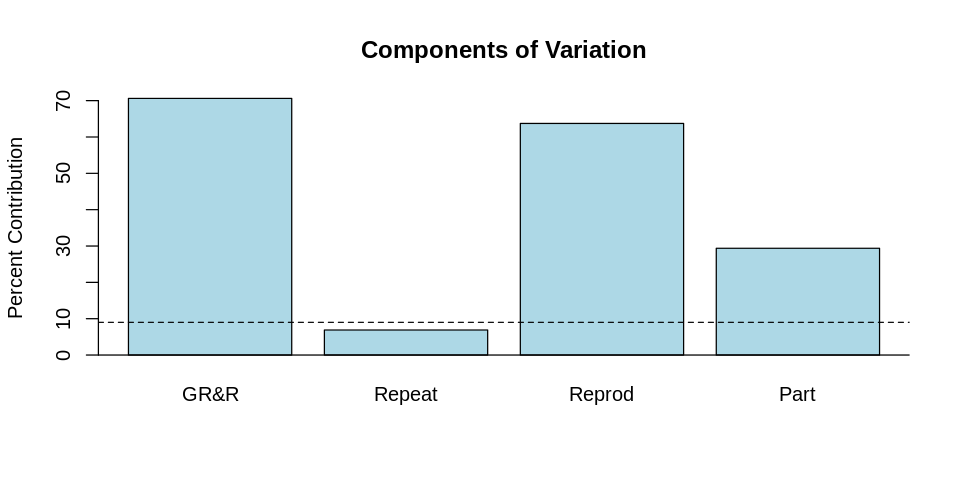

In [12]:
options(repr.plot.width = 8, repr.plot.height = 4)
comp.var.out<-comp.var[1:2]
comp.var.out$Source<-rownames(comp.var.out)
comp.var.out<-comp.var.out[c(3,1,2)]
bp.compvar<-comp.var.out[c(1:3,6),]

barplot(height = bp.compvar$Pct_Cont
        , names.arg = c("GR&R", "Repeat", "Reprod","Part")
        , main = "Components of Variation"
        , ylab = "Percent Contribution"
        , col = "light blue")
abline(h=0)
abline(h=9, lty=2)

In [13]:
# Xbar and R Chart --------------------------------------------------------
# Split Data by Operator
Op1 <- potential[which(potential$Operator=="Operator 1"),]
Op1 <- Op1[order(Op1$Part),]

Op2 <- potential[which(potential$Operator=="Operator 2"),]
Op2 <- Op2[order(Op2$Part),]

In [14]:
# Extract data
op1.chart <- spc.chart.variables.mean.and.meanrange(
  data = Op1$Value,
  sample = as.numeric(Op1$Part),
  combine.charts = "separate",
  chart1.display = F,
  chart2.display = F)
op2.chart <- spc.chart.variables.mean.and.meanrange(
  data = Op2$Value,
  sample = as.numeric(Op2$Part),
  combine.charts = "separate",
  chart1.display = F,
  chart2.display = F)

In [15]:
# Combine means and ranges
means<-c(op1.chart$parameter.means
         ,op2.chart$parameter.means)

ranges<-c(op1.chart$parameter.ranges
          ,op2.chart$parameter.ranges)

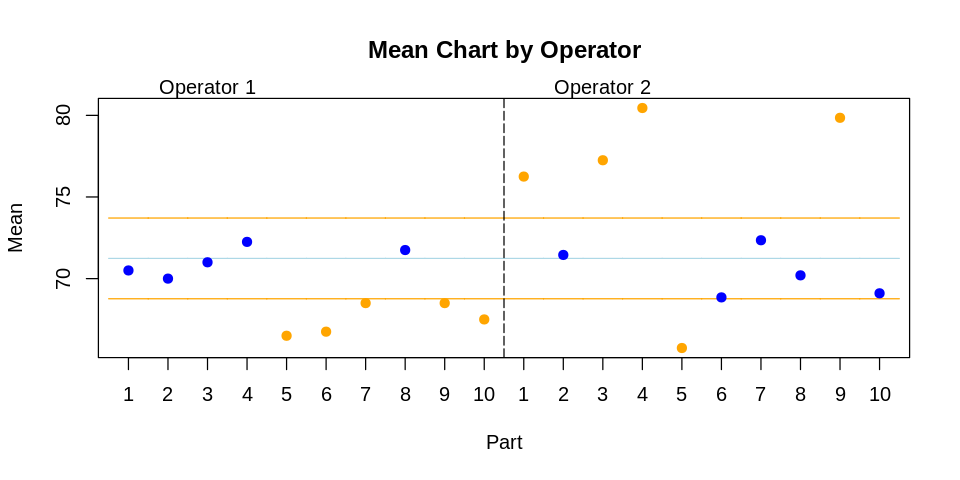

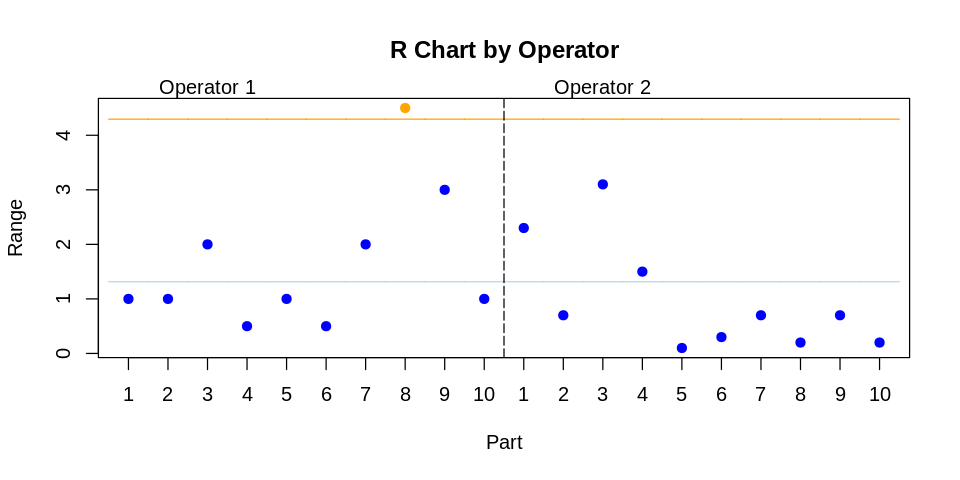

In [16]:
# Create combined chart
spc.chart.variables.mean.and.meanrange.simple(
  means = means,
  ranges = ranges,
  sample.size = 2,
  combine.charts = "separate",
  x = c(1:10, 1:10),
  chart1.main = "Mean Chart by Operator",
  chart1.xlab = "Part",
  chart2.main = "R Chart by Operator",
  chart2.xlab = "Part",
  chart1.line.col = "white",
  chart2.line.col = "white",
  chart1.after.plot = function() {
    abline(v = 10.5
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 13) },
  chart2.after.plot = function() {
    abline(v = 10.5
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 13) }
)

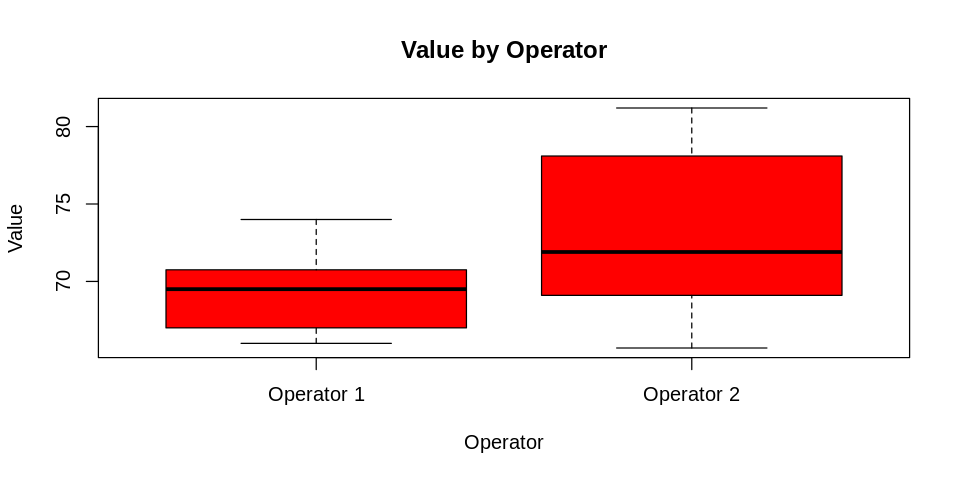

In [17]:
# Boxplot - Value by Operator ---------------------------------------------
boxplot(Value ~ Operator,
        data = potential,
        col = "red",
        main = "Value by Operator")

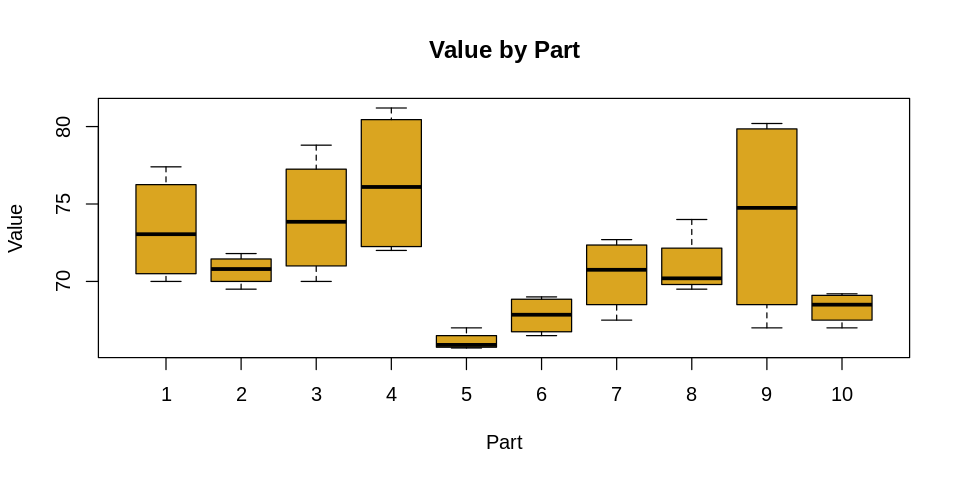

In [18]:
# Boxplot - Value by Part -------------------------------------------------
boxplot(Value ~ Part,
        data = potential,
        col = "goldenrod",
        main = "Value by Part")

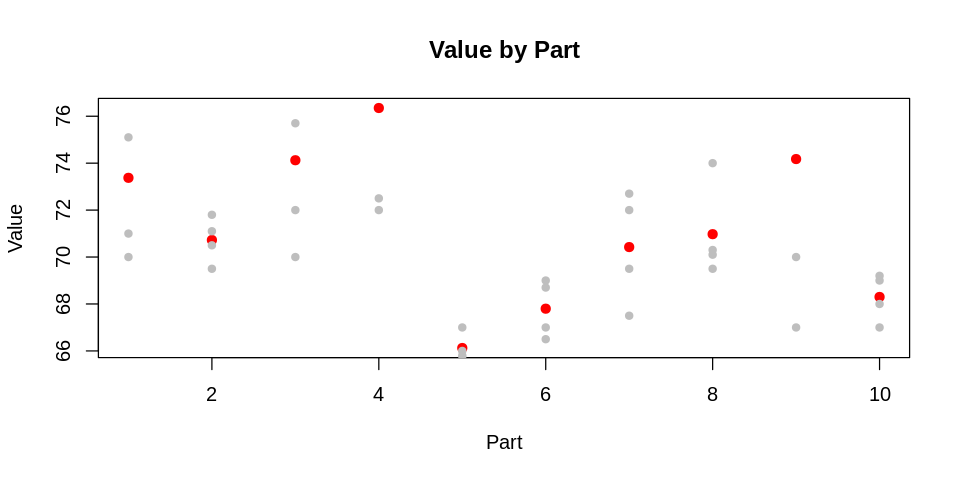

In [19]:
# Line / Point Chart - Value by Part --------------------------------------
lc <-aggregate(potential$Value
               ,by = list(as.numeric(potential$Part))
               ,FUN = mean)

plot(
  x = lc$x,
  type = "p",
  pch = 19,
  col = "red",
  main = "Value by Part",
  xlab = "Part",
  ylab = "Value"
)
points(
  x    = potential$Part,
  y   = potential$Value,
  pch = 19,
  col = " grey",
  cex = 0.8,
  bty = "n"
)


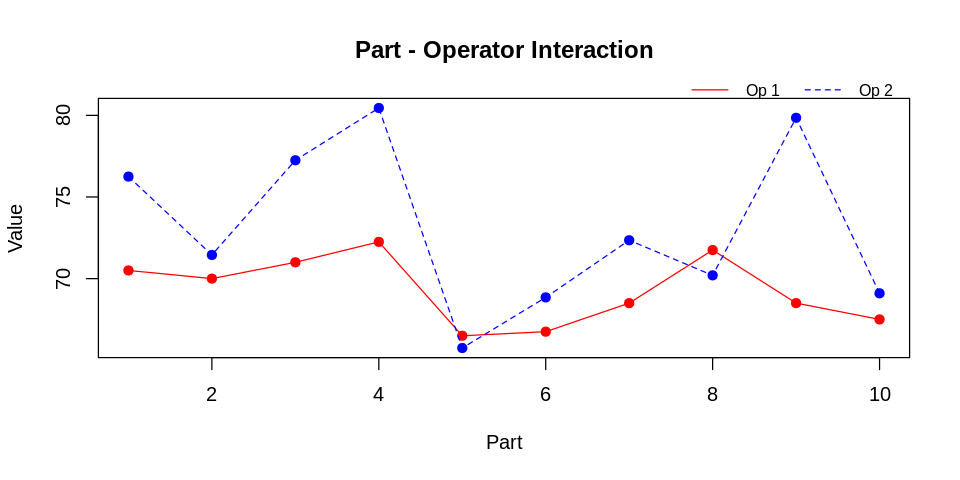

In [20]:
# Part Operator Interaction -----------------------------------------------
plot(op1.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "red",
  xlab = "Part",
  ylab = "Value"  ,
  main = "Part - Operator Interaction",
  ylim = c(min(op1.chart$parameter.means, op2.chart$parameter.means),
    max(op1.chart$parameter.means, op2.chart$parameter.means)
  )
)
lines(
  op2.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "blue",
  lty = 2
)
legend("bottomright",inset = c(0, 1),
  xpd = TRUE,
  legend = c("Op 1", "Op 2"),
  col = c("red", "blue"),
  horiz = T,
  lty = 1:2,
  cex = 0.8,
  bty = "n"
)

<table width=1400><td bgcolor="#d5695d"><font color="white" size="6"><b>
Quiz Part1
</b></font></td></table>

<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.1 Import data
</b><br><br>
&#10140; Two Appraisers -------- a =2 <br>
&#10140; 10 parts -------------------- b = 10 <br>
&#10140; Two Repetitions -------- n = 2
</font></td></table>

In [ ]:
# Potential Study (Gauge R&R) ---------------------------------------------
height <- read.delim("https://raw.githubusercontent.com/milanfx/Dataset/main/DTSA/DTSA-5706/height.dat")
head(height)

,Part,Operator,Repetition,Value
,<int>,<int>,<int>,<dbl>
1,1,1,1,488.418
2,2,1,1,484.798
3,3,1,1,489.445
4,4,1,1,485.758
5,5,1,1,489.043
6,6,1,1,484.415


<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.2 Two Way Random Effects ANOVA
</b><br><br>
&#10140; Appraiser<br>
&#10140; Part
</font></td></table>

In [ ]:
# Potential Study: ANOVA Method -------------------------------------------
# Change Part and Operator to Factors
height$Repetition <- factor(height$Repetition)
height$Part <- factor(height$Part)
height$Operator <- factor(height$Operator,labels = c("Operator 1", "Operator 2"))
head(height)

,Part,Operator,Repetition,Value
,<fct>,<fct>,<fct>,<dbl>
1,1,Operator 1,1,488.418
2,2,Operator 1,1,484.798
3,3,Operator 1,1,489.445
4,4,Operator 1,1,485.758
5,5,Operator 1,1,489.043
6,6,Operator 1,1,484.415


In [ ]:
pot2.out <- ro(msa.continuous.repeatability.reproducibility(
  measurement = height$Value
  ,part = height$Part
  ,appraiser = height$Operator
  ,stat.lsl = 480
  ,stat.usl = 495), 5)

(anova.out <- data.frame(pot2.out$summary.aov.full[[1]]))

,Df,Sum.Sq,Mean.Sq,F.value,Pr..F.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
part,9,276.38795,30.70977,90.37412,0.00000
appraiser,1,5.51158,5.51158,16.21972,0.00298
part:appraiser,9,3.05826,0.33981,1.29508,0.29926
Repeatability,20,5.24765,0.26238,NA,NA
Total,39,290.20545,NA,NA,NA


<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.3 Components of Variance
</b><br><br>
&#10140; Reproducibility: Variation due to Appraisers and Appraisers with Parts<br>
&#10140; Repeatability: Variation due to Gauge<br>
&#10140; Process: Variation due to Parts
</font></td></table>

In [ ]:
# Components of Variance --------------------------------------------------
# Expected Mean Squares
(anova.result <- EMSanova(formula = Value ~ Operator*Part, data = height, type = c("R", "R")))

,Df,SS,MS,Fvalue,Pvalue,Sig,EMS
,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Operator,1,5.511578,5.5115776,16.2197,0.003,**,Error+2Operator:Part+20Operator
Part,9,276.387954,30.7097727,90.3741,<0.0001,***,Error+2Operator:Part+4Part
Operator:Part,9,3.058264,0.3398072,1.2951,0.2993,,Error+2Operator:Part
Residuals,20,5.247654,0.2623827,,,,Error


<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.4 Calculation
</b><br><br>
Repeatability = 1.51<br>
&#10140; σ(Gauge)^2 = MS(residual) = 1.51 <br>
Reproducibility = 6.489 + 7.51 = 13.9955<br>
&#10140; σ(App)^2 = ( MS(App) - MS(App*Part) ) / nb = (146.31-16.53)/20 = 6.489<br>
&#10140; σ(App*Part)^2 = ( MS(App*Part) - σ(Gauge)^2 ) / n = (16.53-1.51)/2 = 7.51 <br>
Process = 6.45 <br>
&#10140; σ(Part)^2 = ( MS(App) - MS(App*Part) ) / na = (146.31-16.53)/4 = 6.45
</font></td></table>

In [ ]:
(comp.var <- data.frame(pot2.out$ev.full))

,Component,Pct_Cont,StdDev,StudyVar,Pct_StudyVar,Pct_Tolerance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Total Gage R&R,0.55968,6.87,0.74812,4.48872,26.20,29.92
Repeatability,0.26238,3.22,0.51223,3.07340,17.94,20.49
Reproducibility,0.29730,3.65,0.54525,3.27152,19.10,21.81
Appraiser,0.25859,3.17,0.50852,3.05110,17.81,20.34
Part:Appraiser,0.03871,0.47,0.19675,1.18053,6.89,7.87
Part-To-Part,7.59249,93.13,2.75545,16.53269,96.51,110.22
Total Variation,8.15217,100.00,2.85520,17.13121,100.00,114.21


<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.5 % GRR Component Contribution (Pct Cont)
</b><br><br>
GRR = 70.62 <br>
Repeatability = 6.89 <br>
Reproducibility = 63.73 <br>
Part = 29.38
<br><br>
< 1%: Potential Acceptability <br>
1% - 9%: May be acceptable <br>
> 9%: System need improvement
</font></td></table>

<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.6 % Study Variation Contribution(Pct Tolerance)
</b><br><br>
GRR = 262.55	 <br>
Repeatability = 82.02 <br>
Reproducibility = 249.40 <br>
Part = 169.33
<br><br>
< 10%: Potential Acceptability <br>
10% - 30%: May be acceptable <br>
> 30%: System need improvement
</font></td></table>

<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.7 Number of distinct categories (NDC)
</b><br><br>
NDC = sqrt(2) * PV / GRR = 1
<br><br>
> 10: Potential Acceptability <br>
5 - 9: May be acceptable <br>
< 5: System need improvement
</font></td></table>

In [ ]:
# Number of distinct categories (NDC) -------------------------------------
# Should be greater than 5
pot2.out$ev.reduced.number.distinct.categories

[1] 5

<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.8 Discrimination Ratio
</b><br><br>
DR = sqrt(2 * σ(Total)^2/GRR^2 - 1) = 1.35
<br><br>
> 4: Potential Acceptability
</font></td></table>

In [ ]:
# # Discrimination Ratio -------------------------------------
# Should be greater than 4
pot2.out$ev.reduced.discrimination.ratio

[1] 5.36426

<table width="1400"><td bgcolor="#f8f2e4"><font color="black" size="4"><b>
2.9 Data Visualization
</b><br><br>
1. Components of Variation <br>
2. X_bar and R<br>
3. Value by Operator <br>
4. Value by Part
</font></td></table>

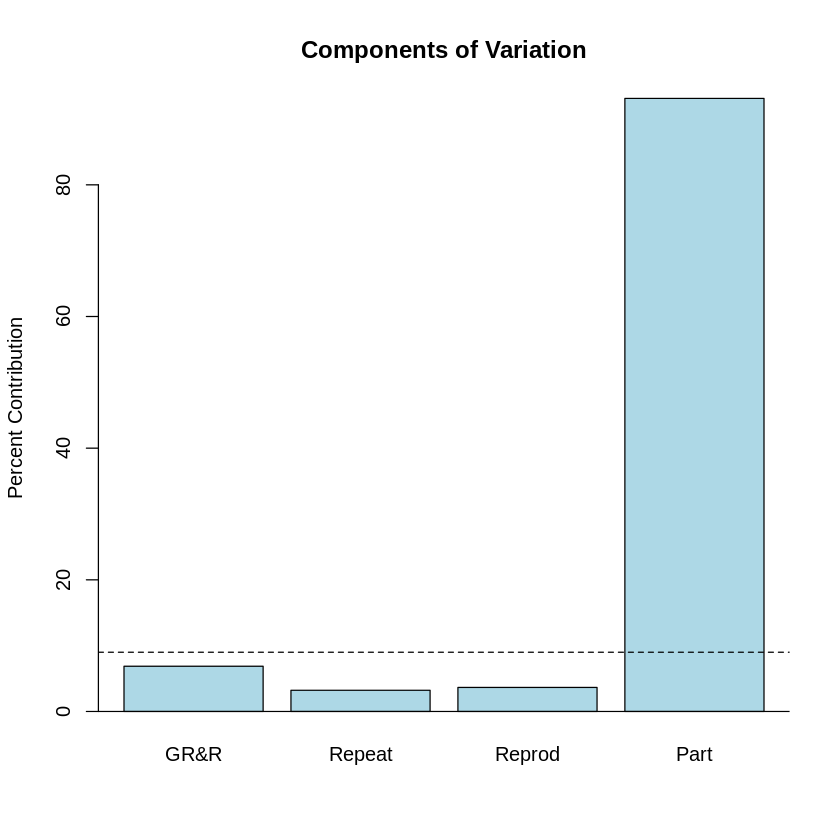

In [ ]:
comp.var.out<-comp.var[1:2]
comp.var.out$Source<-rownames(comp.var.out)
comp.var.out<-comp.var.out[c(3,1,2)]
bp.compvar<-comp.var.out[c(1:3,6),]

barplot(height = bp.compvar$Pct_Cont
        , names.arg = c("GR&R", "Repeat", "Reprod","Part")
        , main = "Components of Variation"
        , ylab = "Percent Contribution"
        , col = "light blue")

abline(h=0)
abline(h=9, lty=2)

In [ ]:
# Xbar and R Chart --------------------------------------------------------
# Split Data by Operator
Op1 <- potential[which(height$Operator=="Operator 1"),]
Op1 <- Op1[order(Op1$Part),]

Op2 <- potential[which(height$Operator=="Operator 2"),]
Op2 <- Op2[order(Op2$Part),]

In [ ]:
# Extract data
op1.chart <- spc.chart.variables.mean.and.meanrange(
  data = Op1$Value,
  sample = as.numeric(Op1$Part),
  combine.charts = "separate",
  chart1.display = F,
  chart2.display = F)
op2.chart <- spc.chart.variables.mean.and.meanrange(
  data = Op2$Value,
  sample = as.numeric(Op2$Part),
  combine.charts = "separate",
  chart1.display = F,
  chart2.display = F)

In [ ]:
# Combine means and ranges
means<-c(op1.chart$parameter.means
         ,op2.chart$parameter.means)

ranges<-c(op1.chart$parameter.ranges
          ,op2.chart$parameter.ranges)

[1] 72.55 70.30 72.85 75.85 65.85 67.60 69.75 69.80 73.25 68.10 74.20 71.15
[13] 75.40 76.85 66.40 68.00 71.10 72.15 75.10 68.50

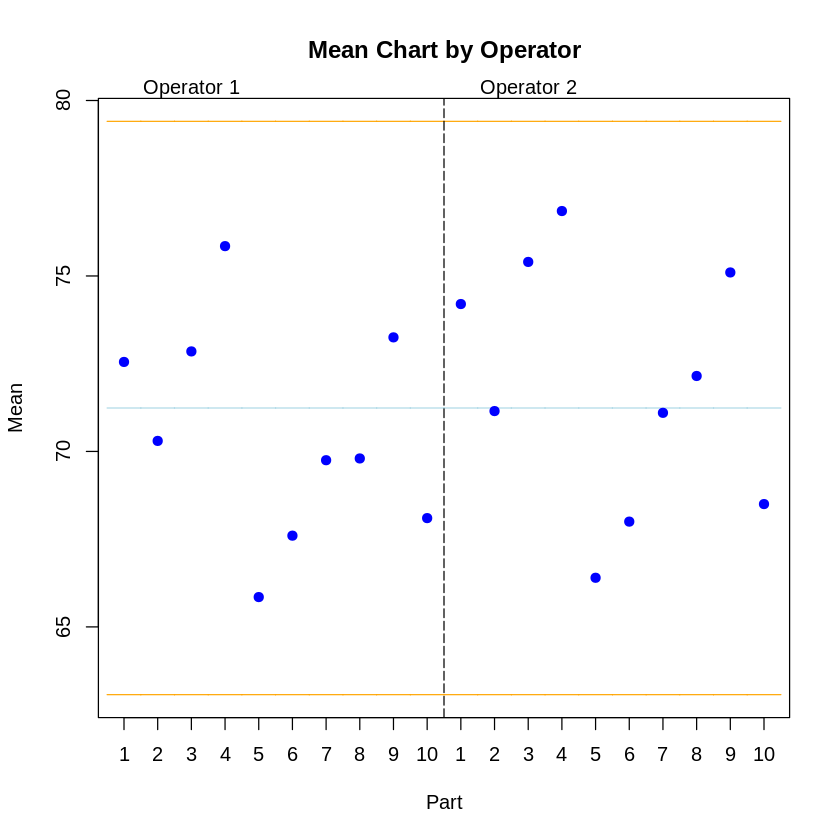

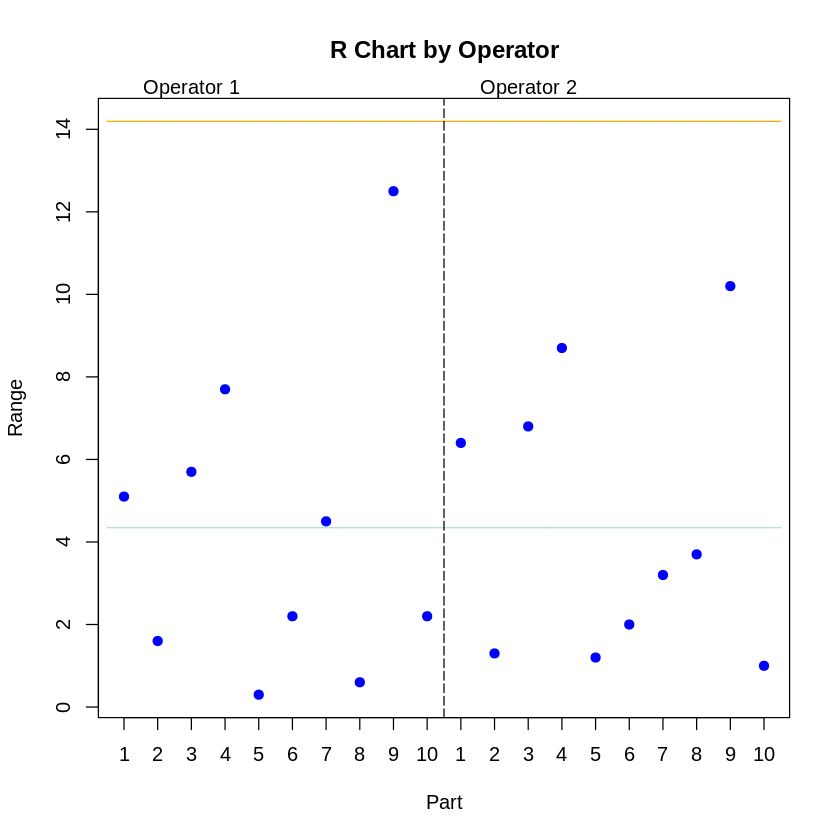

In [ ]:
# Create combined chart
spc.chart.variables.mean.and.meanrange.simple(
  means = means,
  ranges = ranges,
  sample.size = 2,
  combine.charts = "separate",
  x = c(1:10, 1:10),
  chart1.main = "Mean Chart by Operator",
  chart1.xlab = "Part",
  chart2.main = "R Chart by Operator",
  chart2.xlab = "Part",
  chart1.line.col = "white",
  chart2.line.col = "white",
  chart1.after.plot = function() {
    abline(v = 10.5
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 13) },
  chart2.after.plot = function() {
    abline(v = 10.5
           , lty = "longdash")
    mtext("Operator 1", side = 3
          , at = 3)
    mtext("Operator 2", side = 3
          , at = 13) }
)

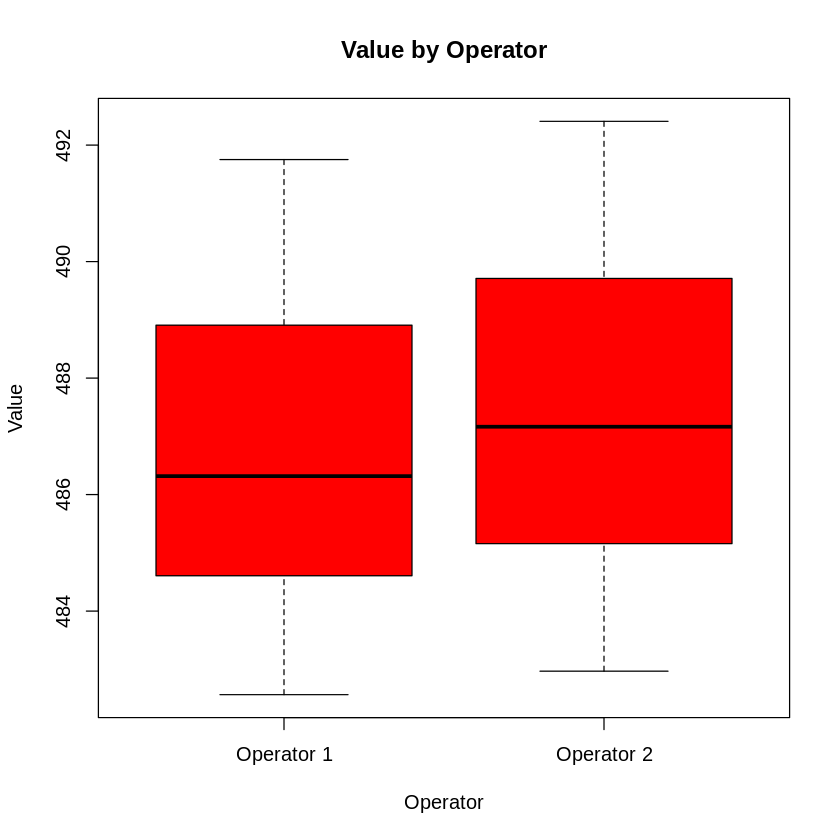

In [ ]:
# Boxplot - Value by Operator ---------------------------------------------
boxplot(Value ~ Operator,
        data = height,
        col = "red",
        main = "Value by Operator")

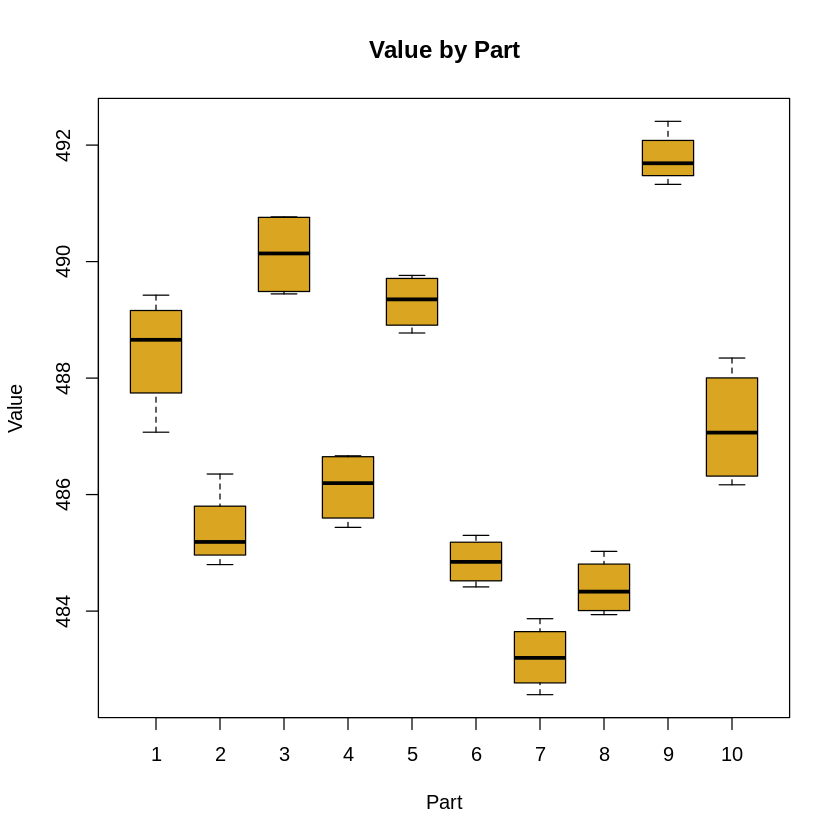

In [ ]:
# Boxplot - Value by Part -------------------------------------------------
boxplot(Value ~ Part,
        data = height,
        col = "goldenrod",
        main = "Value by Part")

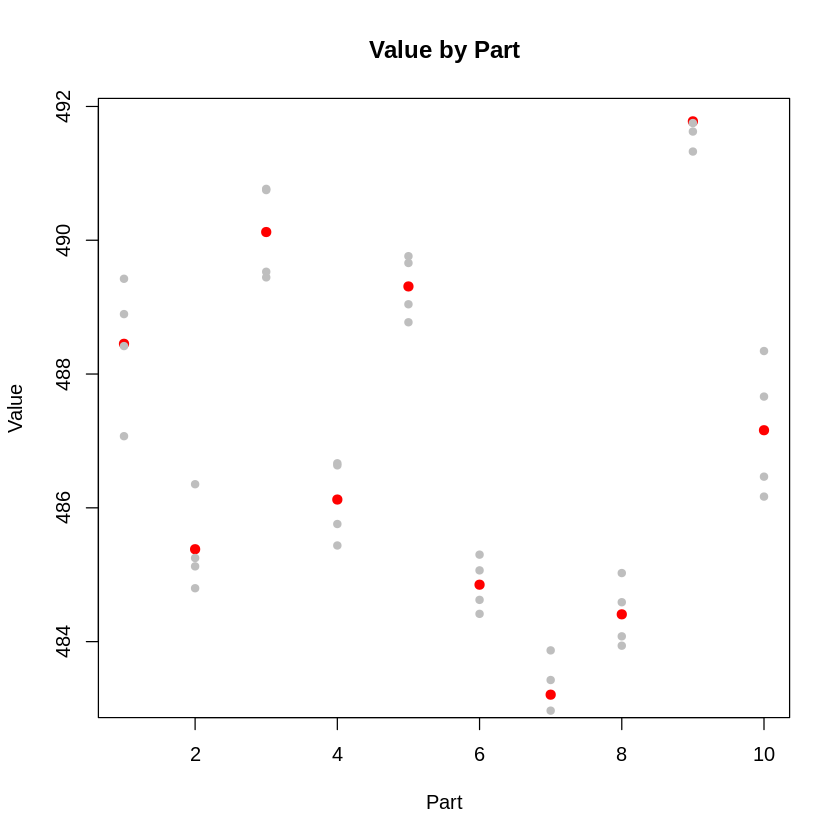

In [ ]:
# Line / Point Chart - Value by Part --------------------------------------
lc <-aggregate(height$Value
               ,by = list(as.numeric(height$Part))
               ,FUN = mean)

plot(
  x = lc$x,
  type = "p",
  pch = 19,
  col = "red",
  main = "Value by Part",
  xlab = "Part",
  ylab = "Value"
)
points(
  x    = height$Part,
  y   = height$Value,
  pch = 19,
  col = " grey",
  cex = 0.8,
  bty = "n"
)


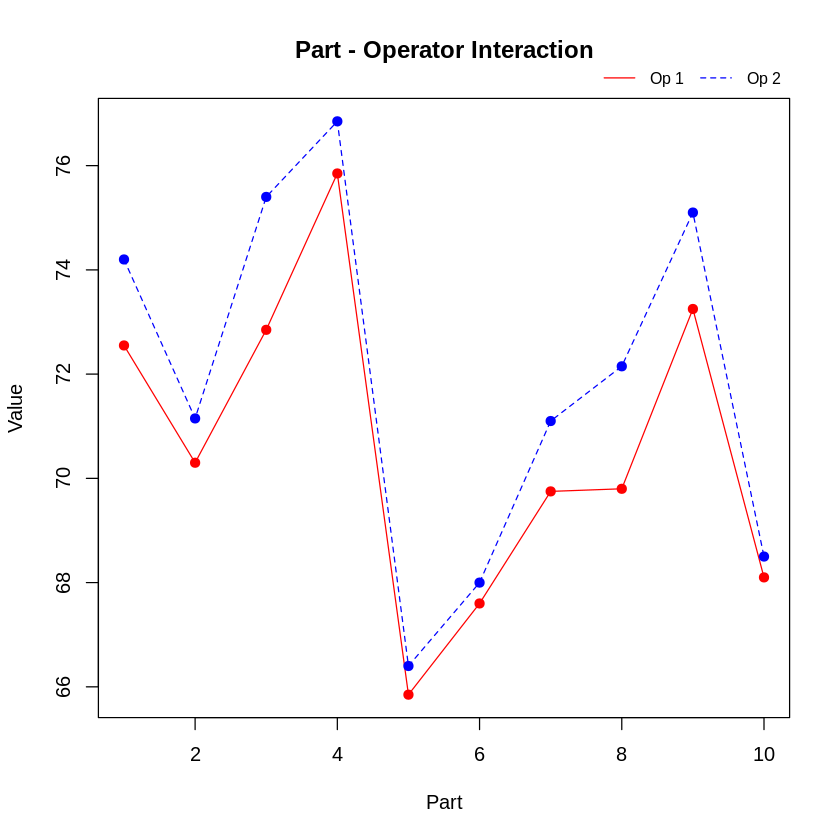

In [ ]:
# Part Operator Interaction -----------------------------------------------
plot(op1.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "red",
  xlab = "Part",
  ylab = "Value"  ,
  main = "Part - Operator Interaction",
  ylim = c(min(op1.chart$parameter.means, op2.chart$parameter.means),
    max(op1.chart$parameter.means, op2.chart$parameter.means)
  )
)
lines(
  op2.chart$parameter.means,
  type = "o",
  pch = 19,
  col = "blue",
  lty = 2
)
legend("bottomright",inset = c(0, 1),
  xpd = TRUE,
  legend = c("Op 1", "Op 2"),
  col = c("red", "blue"),
  horiz = T,
  lty = 1:2,
  cex = 0.8,
  bty = "n"
)